In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

d2l.use_svg_display()

In [2]:

def get_dataloader_workers():
    """Use 4 processes to read the data.

    Defined in :numref:`sec_fashion_mnist`"""
    return 4

def load_data_fashion_mnist(batch_size, resize=None):#不修改则默认为28x28
    """Download the Fashion-MNIST dataset and then load it into memory.

    Defined in :numref:`sec_fashion_mnist`"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))#插入列表前面
    trans = transforms.Compose(trans)#Composes several transforms together
    
    #从网上下载训练集(长度:60000)和测试集(长度:10000)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    #返回迭代器
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),#Num_workers进程数
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [3]:
def get_fashion_mnist_labels(labels):#获取图片标号对应的名称
    """Return text labels for the Fashion-MNIST dataset.

    Defined in :numref:`sec_fashion_mnist`"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images.

    Defined in :numref:`sec_fashion_mnist`"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()#矩阵展开为向量
    for i, (ax, img) in enumerate(zip(axes, imgs)):#The enumerate object yields pairs containing a count
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        #ax.set_axis_labels
        # ax.axes.get_xaxis().set_visible(False)
        # ax.axes.get_yaxis().set_visible(False)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    return axes

torch.Size([18, 1, 28, 28])

torch.Size([18])

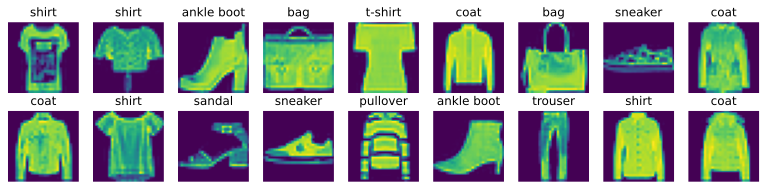

In [4]:
mnist_train_iter,_=load_data_fashion_mnist(18)
X,Y=next(iter(mnist_train_iter))
X.shape
Y.shape
_=show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(Y))

In [8]:
%%time
mnist_train_iter,_=load_data_fashion_mnist(256)
for X,y in mnist_train_iter:
    continue


CPU times: user 1.36 s, sys: 818 ms, total: 2.17 s
Wall time: 4.97 s
